<a href="https://colab.research.google.com/github/rena-tech/for-copy/blob/main/%E6%BC%94%E7%BF%92%E3%83%BB%E3%83%9E%E3%83%BC%E3%82%B7%E3%82%99%E3%83%B3%E6%9C%80%E5%A4%A7%E3%81%AE%E5%8E%9F%E7%90%86_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
pip install japanize_matplotlib

In [16]:
import numpy as np
import random
import pandas as pd
from matplotlib import animation, rc
import matplotlib.patches as patches
from IPython.display import HTML
import matplotlib.pyplot as plt
import japanize_matplotlib
import pickle
import sympy as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# マージン最大の原理
以下のプログラムで生成される訓練データを**線形分類器**により分類することを考えます。

> #### 線形分類器
2種類のラベルが与えられた$n$次元の訓練データを分離する$(n-1)$次元の超平面を探す分類アルゴリズムです。
例えば、ラベルを$-1$と$+1$とすると、
線形分類器は係数$a_0, \dots, a_n$を探し出して、大多数の訓練データに対して、
>- データ$(x_1, \dots, x_n)$のラベルが$-1$ならば、$a_0 + a_1x_1 + \dots + a_nx_n < 0$
>- データ$(x_1, \dots, x_n)$のラベルが$＋1$ならば、$a_0 + a_1x_1 + \dots + a_nx_n > 0$
>
> が成り立つような$a_0, \dots, a_n$を探索します。
>
> 線形分類器の代表的な例は、**ロジスティック回帰（Logistic Regression）**、
**パーセプトロン（Perceptron）**, **SVC（Support Vector Machine）**などです。

```python
nSample = np.random.rand(5,2) + [-1,0]
pSample = np.random.rand(5,2) + [1,0]
print(nSample)
print(pSample)
neg = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in nSample])
pos = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in pSample])
```

In [23]:
nSample = np.random.rand(5,2) + [-1,0]
pSample = np.random.rand(5,2) + [1,0]
print(nSample)
print(pSample)
neg = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in nSample])
pos = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in pSample])

[[-0.51944231  0.90409042]
 [-0.83238648  0.79340159]
 [-0.53786359  0.25694119]
 [-0.31353024  0.24433258]
 [-0.84662555  0.33015615]]
[[1.29288293 0.73036976]
 [1.76600474 0.10583182]
 [1.76788015 0.2565684 ]
 [1.22655621 0.70575236]
 [1.87375231 0.60724155]]


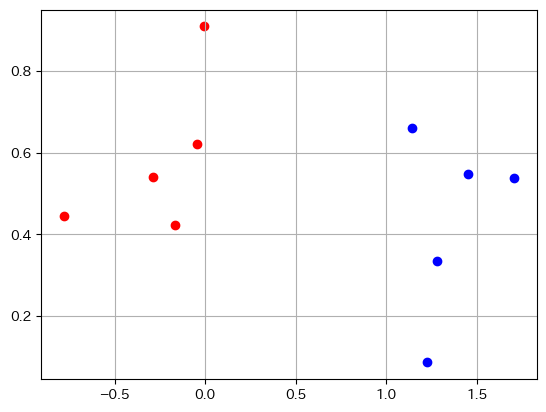

In [25]:
nSample = np.random.rand(5,2) + [-1,0]
pSample = np.random.rand(5,2) + [1,0]
plt.scatter(nSample [:,0], nSample [:,1], c='r')
plt.scatter(pSample[:,0], pSample [:, 1], c='b')
plt.grid()
plt.show()

上記のプログラムで生成した訓練データは2次元データですので、
線形分類器は直線$a_0 + a_1 x + a_2 y = 0$で青のプロット（$+1$）と赤のプロット（$-1$）を分離します。

例えば、パーセプトロン（sklearn.linear_model.Perceptron）を使って、
分離直線を探してみましょう。
```python
from sklearn.linear_model import Perceptron
model = Perceptron()

train = np.concatenate([nSample,pSample])
label = [-1]*len(nSample) + [1]*len(pSample)
model.fit(train, label)
ymin = min(min(nSample[:,1]), min(pSample[:,1]))
ymax = max(max(nSample[:,1]), max(pSample[:,1]))
plt.scatter(nSample[:,0], nSample[:,1], c='r')
plt.scatter(pSample[:,0], pSample[:,1], c='b')

plt.plot((-np.array([ymin, ymax])*model.coef_[0,1]-model.intercept_)/model.coef_[0,0], [ymin, ymax], 'g-')
plt.grid()
plt.show()
```

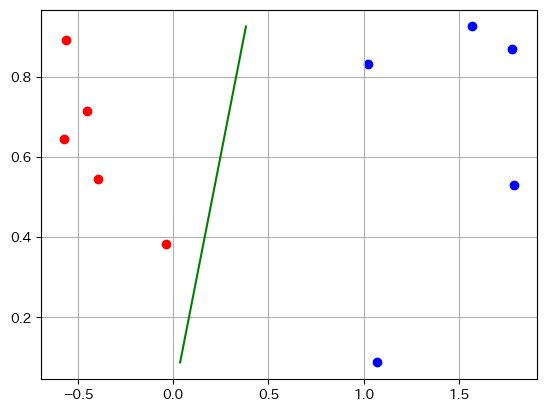

In [17]:
from sklearn.linear_model import Perceptron
model = Perceptron()

train = np.concatenate([nSample,pSample])
label = [-1]*len(nSample) + [1]*len(pSample)
model.fit(train, label)
ymin = min(min(nSample[:,1]), min(pSample[:,1]))
ymax = max(max(nSample[:,1]), max(pSample[:,1]))
plt.scatter(nSample[:,0], nSample[:,1], c='r')
plt.scatter(pSample[:,0], pSample[:,1], c='b')

plt.plot((-np.array([ymin, ymax])*model.coef_[0,1]-model.intercept_)/model.coef_[0,0], [ymin, ymax], 'g-')
plt.grid()
plt.show()
plt.show()


### 演習
線形分類器を、
ロジスティック回帰（sklearn.linear_model.LogisticRegression）、
SVM（sklearn.svm.LinearSVC）に変更して、
同様に分離直線を描画せよ。

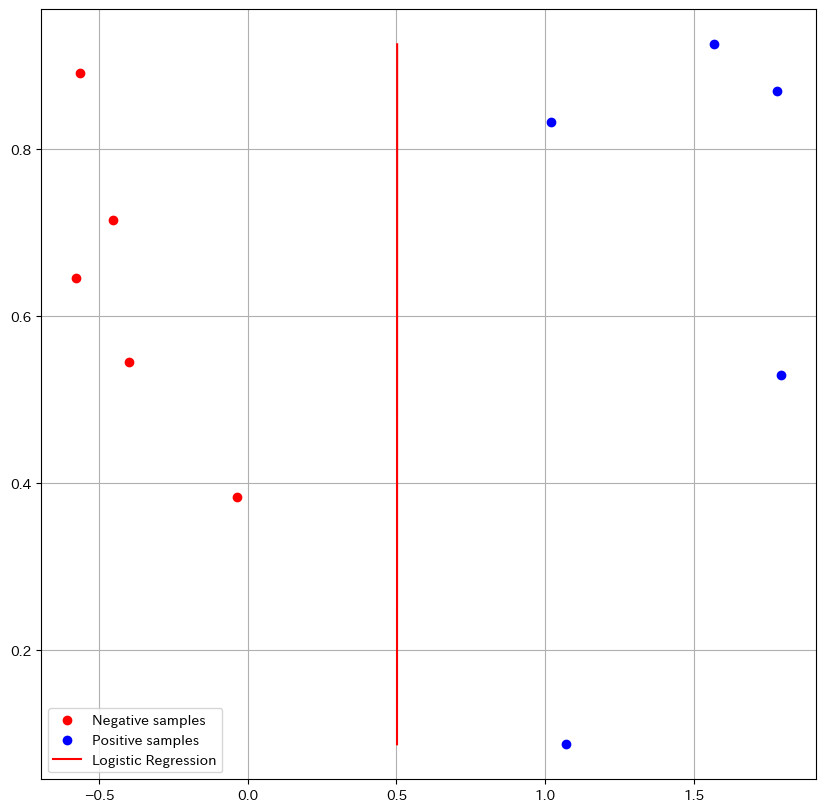

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 訓練データ生成
np.random.seed(0)
nSample = np.random.rand(5,2) + [-1,0]
pSample = np.random.rand(5,2) + [1,0]
train = np.concatenate([nSample, pSample])
label = [-1]*len(nSample) + [1]*len(pSample)

# ロジスティック回帰モデル
model_logistic = LogisticRegression()
model_logistic.fit(train, label)
coef_logistic = model_logistic.coef_[0]
intercept_logistic = model_logistic.intercept_

# 描画
plt.figure(figsize=(10, 10))
plt.scatter(nSample[:,0], nSample[:,1], c='r', label='Negative samples')
plt.scatter(pSample[:,0], pSample[:,1], c='b', label='Positive samples')

ymin = min(min(nSample[:,1]), min(pSample[:,1]))
ymax = max(max(nSample[:,1]), max(pSample[:,1]))

# ロジスティック回帰の分離直線
plt.plot((-np.array([ymin, ymax])*coef_logistic[1]-intercept_logistic)/coef_logistic[0], [ymin, ymax], 'r-', label='Logistic Regression')

plt.legend()
plt.grid()
plt.show()




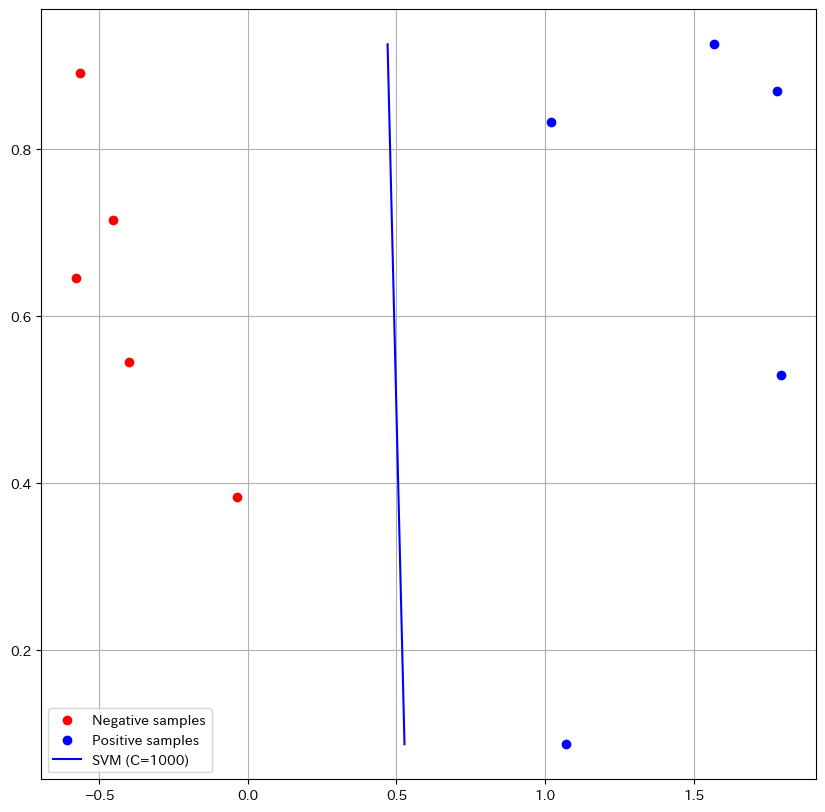

In [19]:
# SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

# 訓練データ生成
np.random.seed(0)
nSample = np.random.rand(5,2) + [-1,0]
pSample = np.random.rand(5,2) + [1,0]
train = np.concatenate([nSample, pSample])
label = [-1]*len(nSample) + [1]*len(pSample)

# SVMモデル
model_svm = LinearSVC(C=1000)
model_svm.fit(train, label)
coef_svm = model_svm.coef_[0]
intercept_svm = model_svm.intercept_

# 描画
plt.figure(figsize=(10, 10))
plt.scatter(nSample[:,0], nSample[:,1], c='r', label='Negative samples')
plt.scatter(pSample[:,0], pSample[:,1], c='b', label='Positive samples')

ymin = min(min(nSample[:,1]), min(pSample[:,1]))
ymax = max(max(nSample[:,1]), max(pSample[:,1]))

# SVMの分離直線
plt.plot((-np.array([ymin, ymax])*coef_svm[1]-intercept_svm)/coef_svm[0], [ymin, ymax], 'b-', label='SVM (C=1000)')

plt.legend()
plt.grid()
plt.show()


分類器によって求められる分離直線が異なることが観察できます。

つまり、訓練データを分離する分離直線は複数存在するのです。

では、複数存在する分離直線の中から最良のものを選択するにはどうすればよいのでしょうか？

以下では、よい分類直線（超平面）を決定する原理として、
**マージン最大の原理**について説明します。

## 1匹いたら100匹いると思え
ゴキブリの話ではありませんが、本質は同じです。

訓練データはサンプルです。
たまたま見かけるゴキブリもサンプルです。
1個の訓練データの周辺には多くのデータが存在する可能性が高いと考えるべきです。

例えば、
以下のプログラムは、
先の訓練データの陰に隠れている「真の」データを薄い赤と薄い青でプロットしたものです。
濃い赤と濃い青でプロットされたサンプル（訓練データ）の周辺に
多くの「真の」データがかくれていることが分かります。

```python
sd = 0.5
neg = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in nSample])
pos = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in pSample])

from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(train, label)

plt.Figure(figsize=(10,10))
plt.scatter(nSample[:,0], nSample[:,1], c='r')
plt.scatter(pSample[:,0], pSample[:,1], c='b')
plt.scatter(neg[:,0], neg[:,1], c='r', alpha=0.2, s=5)
plt.scatter(pos[:,0], pos[:,1], c='b', alpha=0.2, s=5)
ymin = min(min(neg[:,1]), min(pos[:,1]))
ymax = max(max(neg[:,1]), max(pos[:,1]))
plt.plot((-np.array([ymin, ymax])*model.coef_[0,1]-model.intercept_)/model.coef_[0,0], [ymin, ymax], 'g-')
plt.grid()
plt.show()
```

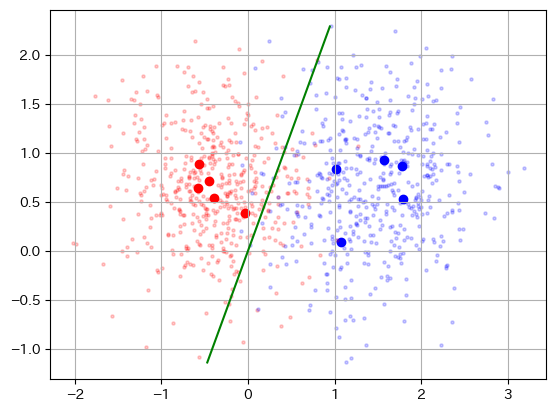

In [20]:
sd = 0.5
neg = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in nSample])
pos = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in pSample])

from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(train, label)

plt.Figure(figsize=(10,10))
plt.scatter(nSample[:,0], nSample[:,1], c='r')
plt.scatter(pSample[:,0], pSample[:,1], c='b')
plt.scatter(neg[:,0], neg[:,1], c='r', alpha=0.2, s=5)
plt.scatter(pos[:,0], pos[:,1], c='b', alpha=0.2, s=5)
ymin = min(min(neg[:,1]), min(pos[:,1]))
ymax = max(max(neg[:,1]), max(pos[:,1]))
plt.plot((-np.array([ymin, ymax])*model.coef_[0,1]-model.intercept_)/model.coef_[0,0], [ymin, ymax], 'g-')
plt.grid()
plt.show()

パーセプトロンによって得られた分離直線が、
真のデータをどのくらい正確に分類しているかを計算してみます。
```python
def accuracy(coef, intercept):
    nHit = len([pt for pt in neg if np.dot(coef, pt) + intercept < 0])
    pHit = len([pt for pt in pos if np.dot(coef, pt) + intercept > 0])
    return (nHit + pHit)/(len(neg) + len(pos))

print(accuracy(model.coef_, model.intercept_))
```

In [21]:
def accuracy(coef, intercept):
    nHit = len([pt for pt in neg if np.dot(coef, pt) + intercept < 0])
    pHit = len([pt for pt in pos if np.dot(coef, pt) + intercept > 0])
    return (nHit + pHit)/(len(neg) + len(pos))

print(accuracy(model.coef_, model.intercept_))



0.92


かなり正確に分類が出来ていると思いますが、
果たして最良でしょうか？

確かめて見ましょう。

次のプログラムを実行すると、
パーセプトロンが選択した分離直線が緑の線で表され、
赤の訓練データと青の訓練データを**丁度真ん中**で分離する直線が黒の破線で表されます。

アニメーションを実行すると、
黒の実戦で表現される分離直線が平行に移動して、
その時々の**真のデータに対する正解率**がどのように変化するかグラフで示されます。

```python
coef = model.coef_[0]
intercept = model.intercept_

hi_lim = min([-np.dot(coef, pt) for pt in nSample])
lo_lim = max([-np.dot(coef, pt) for pt in pSample])

mid = (hi_lim + lo_lim)/2

intercepts = np.linspace(lo_lim, hi_lim, 51)
accs = [accuracy(coef, c) for c in intercepts]

fig, axes = plt.subplots(2, 1, figsize=(8,9))
axes[0].scatter(nSample[:,0], nSample[:,1], c='r')
axes[0].scatter(pSample[:,0], pSample[:,1], c='b')
axes[0].scatter(neg[:,0], neg[:,1], c='r', alpha=0.2, s=5)
axes[0].scatter(pos[:,0], pos[:,1], c='b', alpha=0.2, s=5)
axes[0].plot((-np.array([ymin, ymax])*coef[1]-intercept)/coef[0], [ymin, ymax], 'g-')
axes[0].plot((-np.array([ymin, ymax])*coef[1]-mid)/coef[0], [ymin, ymax], 'k--')
axes[0].grid()
axes[1].plot([mid, mid], [min(accs), max(accs)], 'k--')
axes[1].plot([intercept, intercept], [min(accs), max(accs)], 'g-')
axes[1].xlabel()
axes[1].grid()

ims = []

for i in range(len(intercepts)):
    c = intercepts[i]
    im = axes[0].plot((-np.array([ymin, ymax])*coef[1] - c)/coef[0], [ymin, ymax], 'k-')
    im += axes[1].plot(intercepts[:i+1], accs[:i+1], 'k-')
    ims.append(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=200)
rc('animation', html='jshtml')
plt.close()
display(ani)
```

AttributeError: 'Axes' object has no attribute 'xlabel'

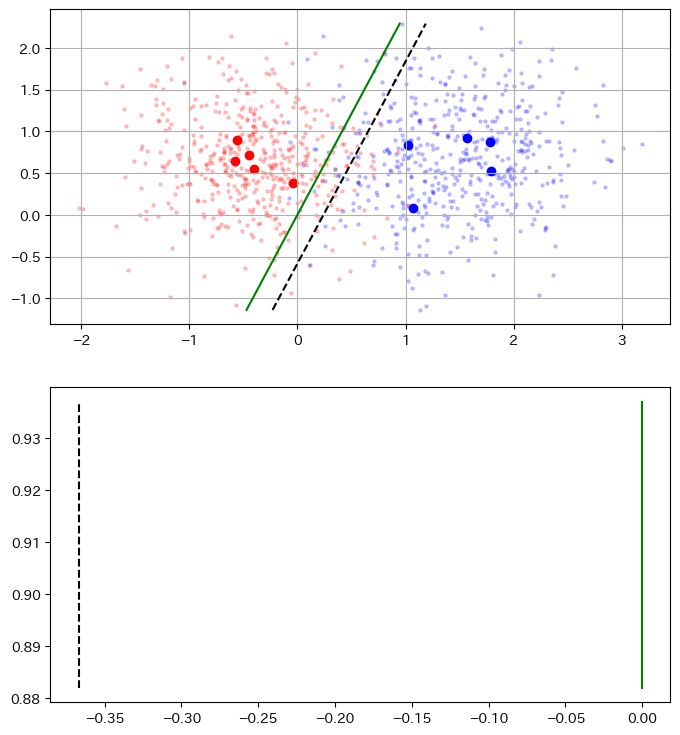

In [22]:
coef = model.coef_[0]
intercept = model.intercept_

hi_lim = min([-np.dot(coef, pt) for pt in nSample])
lo_lim = max([-np.dot(coef, pt) for pt in pSample])

mid = (hi_lim + lo_lim)/2

intercepts = np.linspace(lo_lim, hi_lim, 51)
accs = [accuracy(coef, c) for c in intercepts]

fig, axes = plt.subplots(2, 1, figsize=(8,9))
axes[0].scatter(nSample[:,0], nSample[:,1], c='r')
axes[0].scatter(pSample[:,0], pSample[:,1], c='b')
axes[0].scatter(neg[:,0], neg[:,1], c='r', alpha=0.2, s=5)
axes[0].scatter(pos[:,0], pos[:,1], c='b', alpha=0.2, s=5)
axes[0].plot((-np.array([ymin, ymax])*coef[1]-intercept)/coef[0], [ymin, ymax], 'g-')
axes[0].plot((-np.array([ymin, ymax])*coef[1]-mid)/coef[0], [ymin, ymax], 'k--')
axes[0].grid()
axes[1].plot([mid, mid], [min(accs), max(accs)], 'k--')
axes[1].plot([intercept, intercept], [min(accs), max(accs)], 'g-')
axes[1].xlabel()
axes[1].grid()

ims = []

for i in range(len(intercepts)):
    c = intercepts[i]
    im = axes[0].plot((-np.array([ymin, ymax])*coef[1] - c)/coef[0], [ymin, ymax], 'k-')
    im += axes[1].plot(intercepts[:i+1], accs[:i+1], 'k-')
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=200)
rc('animation', html='jshtml')
plt.close()
display(ani)

正解率は最大に近い値を示す時、
分離直線は、黒の破線で示した**丁度真ん中**の直線に近いことが分かります。

このことは次のように説明することができます。

- 分離直線が赤の訓練データP（ラベル$-1$）の近くを通るとき、
Pの周辺に分布する多数の赤の真のデータを左右に分離してしまいます
- 分離直線が青の訓練データP（ラベル$+1$）の近くを通るとき、
Pの周辺に分布する多数の青の真のデータを左右に分離してしまいます。

分離直線が多くの同色の点を分離すると、不正解のデータが多く発生し、
正解率が下がります。

つまり、色を問わず、**訓練データから最も遠くなるように分離直線を選ぶ**ことで、
「真のデータ」に対する正解率が最大になることを期待することができ、
特に、赤の訓練データと青の訓練データの**丁度真ん中**を通るように
分離直線を選ぶことが望ましいわけです。

今度は、
訓練データを固定したまま訓練データの周りに分布する「真のデータ」をランダムに変化させて、
分離直線が丁度真ん中を通る時（訓練データから最も遠くなる時）に正解率が最大になる確率が高いことを確認してみます。

次のプログラムは、
ランダムに生成した「真のデータ」に対して、
パーセプトロンが計算した分離直線を平行に移動して（傾きはそのままで切片を変化させて）、
最大の正解率を示す切片の値を求めます。
1000通りの真のデータ分布を生成して、それぞれについて最大正解率を示す切片を記録し、
分離直線が赤の訓練データと青の訓練データの丁度真ん中に来るときに（黒の破線）最大正解率を得る
確率が最も高くなることを確かめます。

```python
sd = 0.5
N = 51
intercepts = np.linspace(lo_lim, hi_lim, N)
mid = (lo_lim + hi_lim)/2
count = [0] * N

for _ in range(1000):
    neg = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in nSample])
    pos = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in pSample])
    accs = [accuracy(coef, c) for c in np.linspace(lo_lim, hi_lim, 51)]
    count[np.argmax(accs)] += 1
    
plt.plot(intercepts, count)
plt.plot([mid, mid], [0, max(count)], 'k--')
plt.xlabel('切片')
plt.ylabel('最大の正解率を示す頻度')
plt.grid()
plt.show()
```

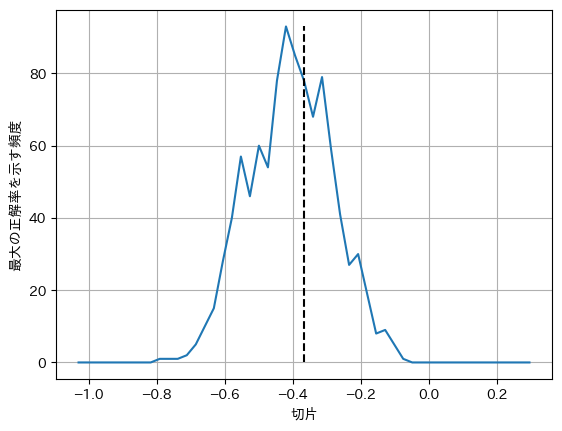

In [24]:
sd = 0.5
N = 51
intercepts = np.linspace(lo_lim, hi_lim, N)
mid = (lo_lim + hi_lim)/2
count = [0] * N

for _ in range(1000):
    neg = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in nSample])
    pos = np.concatenate([sd * np.random.randn(100, 2) + pt for pt in pSample])
    accs = [accuracy(coef, c) for c in np.linspace(lo_lim, hi_lim, 51)]
    count[np.argmax(accs)] += 1

plt.plot(intercepts, count)
plt.plot([mid, mid], [0, max(count)], 'k--')
plt.xlabel('切片')
plt.ylabel('最大の正解率を示す頻度')
plt.grid()
plt.show()

## マージン最大化の原理

分離超平面（分離直線）から最も近い訓練データまでの距離を**マージン**と呼びます。

ここまでの観察から、**マージンが大きいほど高い正解率を期待できる**ことが分かりました。

「マージンを最大化するように分離超平面（分離直線）を選ぶ」という分類器の設計指針を**マージン最大化の原理**と呼びます。

SVMはマージン最大化の原理に基づく分類器です。

#### 演習
sklearn.svm.LinearSVCをハイパーパラメータ`C=1000`で学習させて得られる分離曲線が、
赤の訓練データと青の訓練データと等距離であることを確認せよ。

**ヒント**

- アニメーションのプログラムの先頭にLinearSVCによる学習のコードを挿入する。
- `model = LinearSVC(C=1000)`により初期モデルの生成を行う。
